### Import Necessary Module and Set Path 

In [11]:
import sqlite3 as lite
import os
import sys
import numpy as np
import collections
import matplotlib.pyplot as plt
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [4]:
import analysis as an

In [6]:
# get rid of other region definitions from the complete input_astrid.xml file
! cp input_astrid.xml only_france.xml
# edit only_france so that the only region definition blocks are for French facilities

## Run Cyclus Input file (without ASTRIDs)

In [16]:
! rm only_france.sqlite
! cyclus only_france.xml -o only_france.sqlite

rm: cannot remove 'only_france.sqlite': No such file or directory
              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    

### The output file should be named 
         
          only_france.sqlite

# Compares the fuel supply for just france vs all EU scenario

In [17]:
# get sqlite cursor and simulation time data
cur = an.cursor('only_france.sqlite')
init_year, init_month, duration, timestep = an.simulation_timesteps(cur)

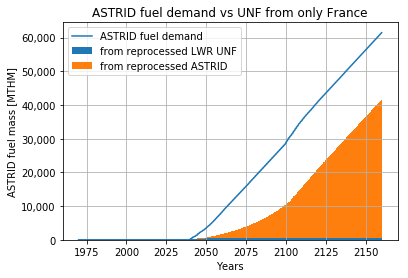

In [19]:
# all EU
agentid = an.agent_ids(cur, 'Reactor')
just_france= an.facility_commodity_flux(cur, agentid, ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                        False, True)
cur_all = an.cursor('full_output.sqlite')
agentid = an.agent_ids(cur_all, 'Reactor')
all_eu = an.facility_commodity_flux(cur_all, agentid, ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                        False, True)
all_eu_all_fuel = [x+y for x,y in zip(all_eu['astrid_fuel_legacy'], all_eu['astrid_fuel_new'])]

years = init_year + timestep/12

z1 = plt.bar(years, just_france['astrid_fuel_legacy'], label='from reprocessed LWR UNF')
z2 = plt.bar(years, just_france['astrid_fuel_new'], bottom=just_france['astrid_fuel_legacy'], label='from reprocessed ASTRID')
z3 = plt.plot(years, all_eu_all_fuel, label='ASTRID fuel demand')
plots = [z1, z2, z3]

ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

axes = plt.gca()
#plt.plot(years, all_eu_all_fuel, label='ASTRID Fuel Demand')
#plt.plot(years, just_france_all_fuel, label='Without EU LWR UNF')
plt.xlabel('Years')
plt.ylabel('ASTRID fuel mass [MTHM]')
plt.title('ASTRID fuel demand vs UNF from only France')
plt.grid()
plt.legend()
plt.savefig('france_only_compare.png', format='png', bbox_inches='tight')
plt.show()
plt.close()

